Getting weird results with my ds_hsab emu, trying to sanity test what I have. 

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
import h5py
from os import path
import numpy as np

/home/users/swmclau2/.local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
aemulator_dir = '/home/users/swmclau2/scratch/Aemulators/'

In [4]:
ds_hsab = h5py.File(path.join(aemulator_dir, 'ds_hsab/PearceDsHSABCosmo.hdf5'), 'r')

In [5]:
ds_hsab_test = h5py.File(path.join(aemulator_dir, 'ds_hsab_test/PearceDsHSABCosmoTest.hdf5'), 'r')

In [6]:
ds_hsab_test2 = h5py.File(path.join(aemulator_dir, 'ds_hsab_test2/PearceDsHSABCosmoTest.hdf5'), 'r')

In [7]:
ds_hsab.attrs['cosmo_param_names']

array(['ombh2', 'omch2', 'w0', 'ns', 'H0', 'Neff', 'sigma8'], dtype='|S6')

In [8]:
ds_hsab_test2.attrs['cosmo_param_names']

array(['ombh2', 'omch2', 'w0', 'ns', 'H0', 'Neff', 'sigma8'], dtype='|S6')

In [9]:
ds_hsab_data = np.zeros((40, 1000, 18))
for i in xrange(40):
    ds_hsab_data[i] = ds_hsab['cosmo_no_%02d'%i]['a_1.000']['obs'][()]

In [10]:
ds_hsab_test_data = np.zeros((35, 100, 18))
for i in xrange(35):
    ds_hsab_test_data[i] = ds_hsab_test['cosmo_no_%02d'%i]['a_1.000']['obs'][()]

In [11]:
ds_hsab_test2_data = np.zeros((35, 100, 18))
for i in xrange(35):
    ds_hsab_test2_data[i] = ds_hsab_test2['cosmo_no_%02d'%i]['a_1.000']['obs'][()]

In [12]:
r_bins = np.logspace(-1, 1.6, 19)
rbc = (r_bins[1:] +r_bins[:-1])/2.0

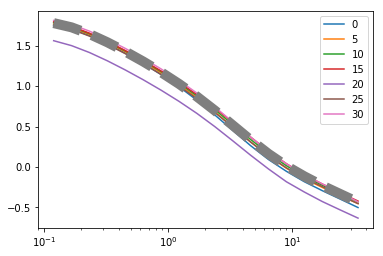

In [39]:
N = 5
for i in xrange(0,35,N):
    plt.plot(rbc, ds_hsab_test2_data[i:i+N].mean(axis = (0,1)), label = i)

denom = ds_hsab_data.mean(axis = (0,1))
plt.legend(loc='best')
plt.plot(rbc, denom, ls = '--', lw=10)
plt.xscale('log')

In [14]:
np.any(np.all(ds_hsab_data==0.0, axis = 2))

False

In [16]:
np.any(np.all(ds_hsab_test2_data==0.0, axis = 2))

False

In [14]:
from pearce.mocks.kittens import TrainingBox

In [15]:
cat = TrainingBox(0)

In [16]:
cat.load(1.0, HOD='hsabZheng07', particles=True, hod_kwargs={'sec_haloprop_key':'halo_local_density_10'})

In [31]:
ds_hsab.attrs['hod_param_vals'][1]

array([-0.42542543, 13.08648649,  0.22027027,  0.68968969, 14.0963964 ,
        1.24534535,  0.52702703])

In [32]:
hod_pnames = ds_hsab.attrs['hod_param_names']
hod_dict = dict(zip(hod_pnames, ds_hsab.attrs['hod_param_vals'][1]))

In [33]:
hod_dict

{'alpha': 1.2453453453453454,
 'conc_gal_bias': 0.527027027027027,
 'logM0': 13.086486486486486,
 'logM1': 14.096396396396395,
 'mean_occupation_centrals_assembias_param1': -0.4254254254254254,
 'mean_occupation_satellites_assembias_param1': 0.6896896896896896,
 'sigma_logM': 0.2202702702702703}

In [34]:
ds_hsab_data.shape

(40, 1000, 18)

In [35]:
cat.populate(hod_dict, min_ptcl=100)

In [ ]:
ds = cat.calc_ds(r_bins, n_cores = 1)

In [ ]:
ds

In [ ]:
denom = ds_hsab_data.mean(axis = (0,1))
plt.plot(rbc, ds_hsab_data[0,1])
plt.plot(rbc, np.log10(ds) )

plt.xscale('log')